# Kevin Alvarez CSC 217 Fall 2019 Homework 9

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

First, let's pull a dataframe containing county-level census data. Specifically, we'll be cleaning it up so that we're looking at the percentage of adults with a bachelor's degree (recorded between 2013 and 2017) for each county.

In [6]:
education = pd.read_csv('data/Education.csv', encoding='ISO-8859-1', header=0)
education = education[['Area name','State', "Percent of adults with a bachelor's degree or higher, 2013-17"]]
education.columns = ['County Name','State', 'Percent_Bachelors_Degree']
education = education.dropna().reset_index(drop=True)

1) Plot a histogram of the percentage of adults with a bachelor's degree or higher. Be sure to properly label the title and axes of the graph.

Text(0.5, 0.92, "Distribution of Bachelor's degree or higher")

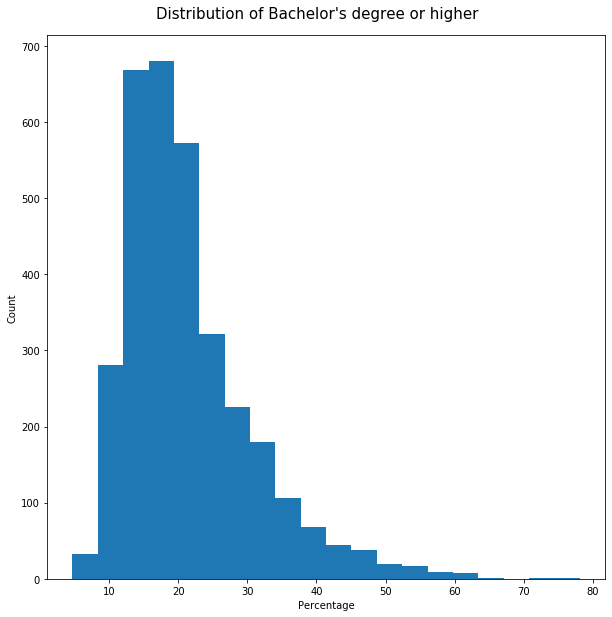

In [8]:
fig = plt.figure(figsize=(10,10))
plt.hist(education["Percent_Bachelors_Degree"], bins=20)
plt.xlabel('Percentage')
plt.ylabel('Count')
fig.suptitle("Distribution of Bachelor's degree or higher", fontsize=15, y=0.92)

2) Is this distribution positively skewed, negatively skewed, or unskewed? If it's skewed, use a transformation to unskew it. Try a few until you find a result that looks closest to a normal distribution and plot a histogram of that transformation, again with proper labelling of the title and axes.

Distribution is positively skewed, I tried log first but decided to go with log.

Text(0.5, 0.92, "Distribution of Bachelor's degree or higher")

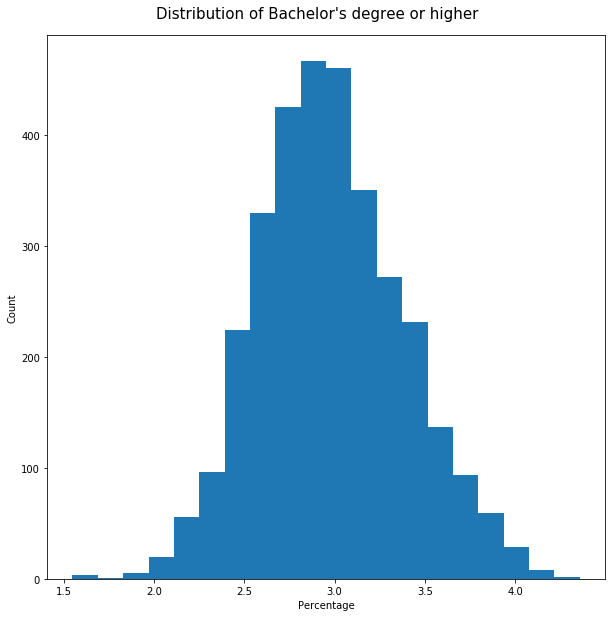

In [10]:
fig = plt.figure(figsize=(10,10))
plt.hist(np.log(education["Percent_Bachelors_Degree"]), bins=20)
plt.xlabel('Percentage')
plt.ylabel('Count')
fig.suptitle("Distribution of Bachelor's degree or higher", fontsize=15, y=0.92)

Now let's look at this data state-by-state. We'll take the mean value of the percentage of adults with a bachelor degree by state (notice this groupby function, as it may be helpful for aggregating data for your projects).

In [12]:
state_mean = education.groupby('State')['Percent_Bachelors_Degree'].mean().reset_index()
state_mean.head()

,State,Percent_Bachelors_Degree
0,AK,22.733333
1,AL,17.517647
2,AR,15.853947
3,AZ,20.381250
4,CA,26.525424


3) Which state has the highest average percentage of adults with a bachelor's degree? Which state has the lowest? (Hint: Look at the 'Descriptive Statistics Class Notebook' all the way back from Week 2 for an idea of how to query this in the dataframe)

If you are not familiar with which abbreviation corresponds to which state, use this for reference: https://www.50states.com/abbreviations.htm

In [16]:
state_mean[state_mean['Percent_Bachelors_Degree'] == np.max(state_mean['Percent_Bachelors_Degree'])]

,State,Percent_Bachelors_Degree
7,DC,56.6


4) Plot a boxplot for the percentage of adults with a bachelor degree by state. Are there any outliers? If so, how many? What is the numerical cutoff for an outlier on either side (hint: an outlier is anything greater than 1.5 * the third quantile or anything less than 1.5 * the first quantile)

(Hint: Look at the 'Descriptive Statistics Class Notebook' all the way back from Week 2 for an idea of how to calculate and find this)

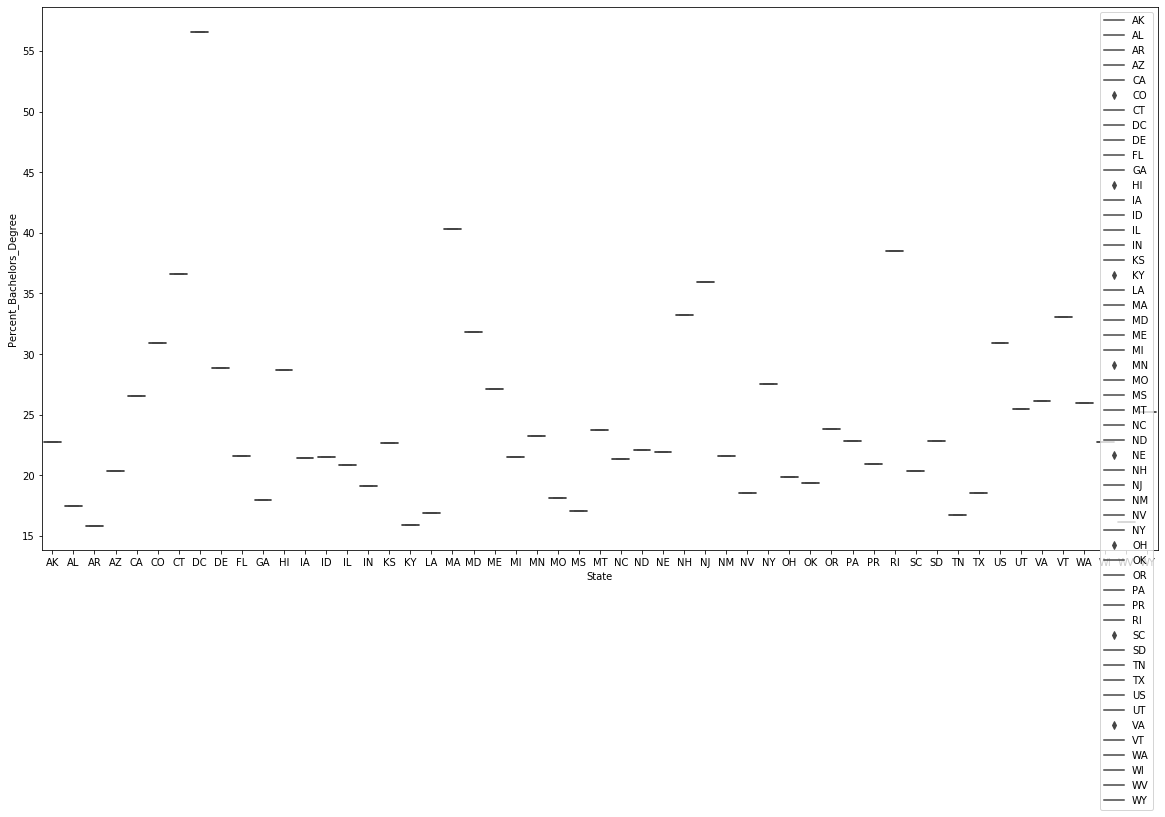

In [27]:
fig = plt.figure(figsize=(20,10))
sns.boxplot( x='State', y='Percent_Bachelors_Degree',data=state_mean)
plt.gca().legend(state_mean['State'].unique())

Now, let's read in a dataset that tells us whether a particular state voted for Al Gore or George Bush in 2000.

In [29]:
votes_2016 = pd.read_excel('data/federalelections2016.xlsx', sheet_name=2, skiprows=3, skipfooter=7)
votes_2016.columns = ['State', 'Electoral_Trump', 'Electoral_Clinton', 'Popular_Trump', 'Popular_Clinton', 'Popular_Others', 'Total_Popular']
votes_2016.head()

,State,Electoral_Trump,Electoral_Clinton,Popular_Trump,Popular_Clinton,Popular_Others,Total_Popular
0,AL,9,NaN,1318255,729547,75570,2123372
1,AK,3,NaN,163387,116454,38767,318608
2,AZ,11,NaN,1252401,1161167,159597,2573165
3,AR,6,NaN,684872,380494,65310,1130676
4,CA,NaN,55,4483814,8753792,943998,14181604


And let's make a list of which states voted blue and voted red based on their electoral vote (note that Maine registered 3 votes for Clinton and 1 for Trump - we will count it as a blue state for this exercise)

In [30]:
blue_states = list(votes_2016[votes_2016['Electoral_Clinton'].notnull()]['State'])
red_states = list(votes_2016[votes_2016['Electoral_Trump'].notnull()]['State'])
#Remove Value from List
red_states.remove('ME')

Finally, we can get dataframes of the percentage of adults with a bachelor's degree for both blue states and red states.

In [33]:
blue_state_means = state_mean[state_mean['State'].isin(blue_states)]
red_state_means = state_mean[state_mean['State'].isin(red_states)]

,State,Percent_Bachelors_Degree
4,CA,26.525424
5,CO,30.881538
6,CT,36.633333
7,DC,56.600000
8,DE,28.825000
11,HI,28.650000
14,IL,20.866990
19,MA,40.306667
20,MD,31.808000
21,ME,27.100000


5) Plot a boxplot showing blue states and red states (hint: you can plot two separate items in a boxplot by plotting an array, i.e. :  
plt.boxplot([df_a['a'], df_b['a'], labels=['a','b'])

Do blue states or red states have a higher mean % of bachelor degrees? What are the means of each? What is the mean difference between the two?

Do either groups of states have outliers? Which states are outliers?

{'whiskers': [<matplotlib.lines.Line2D at 0xbd1a048>,
 'caps': [<matplotlib.lines.Line2D at 0xbdab240>,
 'boxes': [<matplotlib.lines.Line2D at 0xbd1a1d0>,
 'medians': [<matplotlib.lines.Line2D at 0xbdab4a8>,
 'fliers': [<matplotlib.lines.Line2D at 0xbb04cc0>,
 'means': []}

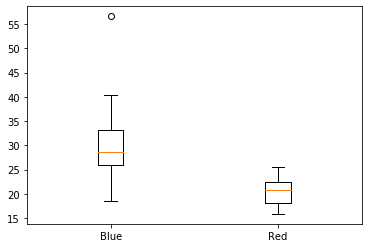

In [34]:
plt.boxplot([blue_state_means['Percent_Bachelors_Degree'],red_state_means['Percent_Bachelors_Degree']],labels=['Blue','Red'])

In [35]:
np.mean(blue_state_means['Percent_Bachelors_Degree'])

30.27389596603505

In [37]:
np.mean(red_state_means['Percent_Bachelors_Degree'])

20.320469809727662

In [36]:
np.mean(blue_state_means['Percent_Bachelors_Degree']) - np.mean(red_state_means['Percent_Bachelors_Degree'])

9.953426156307387

6) Using the pooled variance function below, find the pooled variance and pooled standard deviation for the two groups of states.

In [39]:
def custom_pooled_variance(a, b):
    return ((((len(a) - 1) * np.var(a, ddof=1)) + ((len(b) - 1) * np.var(b, ddof=1))) / (len(a) + len(b) - 2)) * ((1/len(a)) + 1/len(b))

In [40]:
pooled_var = custom_pooled_variance(blue_state_means['Percent_Bachelors_Degree'], red_state_means['Percent_Bachelors_Degree'])
print('Pooled Variance:', np.round(pooled_var, 2))
print('Pooled Standard Deviation:', np.round(np.sqrt(pooled_var), 2))

Pooled Variance: 2.71
Pooled Standard Deviation: 1.65


7) Say that we want to see if the average percentage of adults with bachelor's degrees is higher in blue states than in red states. In this case, what is our null hypothesis and our alternate hypothesis?

8) Find the proper parameters for the T-distribution to test our null hypothesis. What is the mean, standard deviation, and degrees of freedom of our null hypothesis?

Mean: 0  
Standard Deviation: 1.65  
Degrees of Freedom: 49  

9) At a signifiance level of 0.05, what are the rejection region (s?) of our distribution? Make a plot highlighting these rejection region (s?) in red.

10) At a significance level of 0.05, can we reject the null hypothesis? What is the p-value of our observed difference?

Yes, we can reject the null hypothesis, as the mean difference of 9.95 is much higher than the rejection cutoff of 2.76 and has a p-value of close to 0.

BONUS: 11) Now run a boostrapping example using 10,000 simulations. Use np.random.seed(42) to ensure consistency if you run again. Concatenate the blue states and red states, shuffle them, and then break out new blue states and red states, similar to what we did last week in class. Record the difference between the blue states and red states.

Plot a histogram of the 10,000 differences recorded. What is the average difference?

BONUS: 12) At a signifiance level of 0.05, what are the rejection region (s?) of our distribution?

BONUS: 13) At a significance level of 0.05, can we reject the null hypothesis? What is the p-value of our observed difference?